# Practice 09 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [4]:
df = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [5]:
df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,setosa
78,6.0,2.9,4.5,1.5,versicolor
110,6.5,3.2,5.1,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica
19,5.1,3.8,1.5,0.3,setosa


## Subject

* Plot **sepal width** vs. **sepal length** with colors corresponding to the specy
* Train a k-Means model for 3 clusters and plot the results
* Train a Hierarchical Clustering model for 3 clusters and plot the results
* Do again the first three steps now with **petal width** vs. **petal length**
* Which 2D plane gives the best results?

In [ ]:
#plotting 

Text(0, 0.5, 'sepal_width')

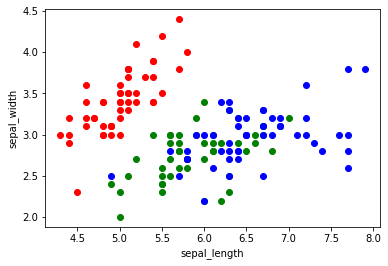

In [34]:
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}

fig, ax = plt.subplots()

for i in range(len(df['sepal_length'])):
    ax.scatter(df['sepal_length'][i], df['sepal_width'][i],color=colors[df['species'][i]])

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [15]:
X = df[['sepal_length','sepal_width' ]]
X.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
#Training the K-Means model 

In [16]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [18]:
y_pred = kmeans.predict(X)
print(y_pred[:10])
np.unique(y_pred)

[0 0 0 0 0 0 0 0 0 0]


array([0, 1, 2])

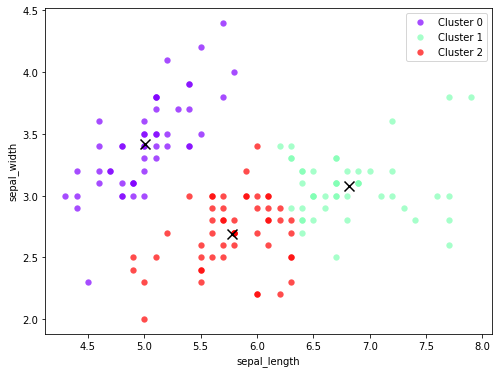

In [21]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

# Plot final centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker = 'x', c = 'black')


plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

In [ ]:
#Training the Hierarchical Clustering model 

In [22]:
k = 3

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

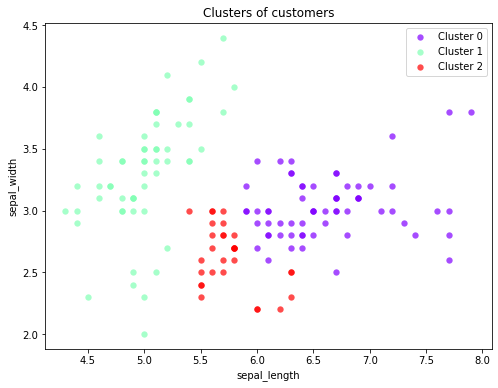

In [24]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_hc == i, 0], X.iloc[y_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))


plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

# petal width vs. petal length

Text(0, 0.5, '\tpetal_length')

C:\Users\choha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


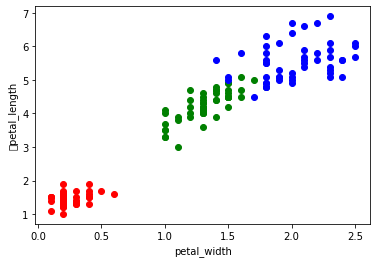

In [25]:
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}

fig, ax = plt.subplots()

for i in range(len(df['sepal_length'])):
    ax.scatter(df['petal_width'][i], df['petal_length'][i],color=colors[df['species'][i]])

ax.set_xlabel('petal_width')
ax.set_ylabel('	petal_length')

In [26]:
X = df[['petal_width','petal_length' ]]
X.head()

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


In [33]:
#Training the K-Means model

In [27]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [28]:
y_pred = kmeans.predict(X)
print(y_pred[:10])
np.unique(y_pred)

[0 0 0 0 0 0 0 0 0 0]


array([0, 1, 2])

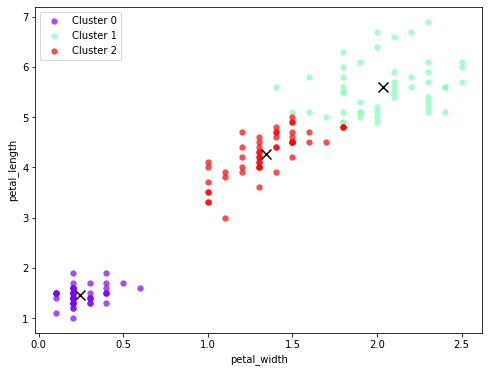

In [29]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

# Plot final centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker = 'x', c = 'black')


plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

In [ ]:
#Training the Hierarchical Clustering model 

In [30]:
k = 3

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

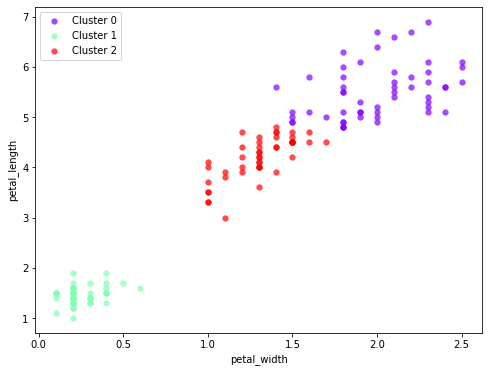

In [32]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_hc == i, 0], X.iloc[y_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))


plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()